# Citypy introduction 

In [49]:
# You need to:
# 1) "pip install citipy" 
# 2) "pip install gmaps"
# Include necessary imports here
from citipy import citipy
import random
import requests
from weather_config import weather_api_key
import datetime as dt
import time
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import gmaps
from weather_config import g_key

## Two APIs: citipy and openweathermap
1. Create a random list of latitudes and Longitude pairs
2. Using citipy get a list of cities nearest the randon coordinates you created
3. Create an API key for openweathermap
4. With the api key and the city list, query openweathermap for information about each city

In [ ]:
# Create a list of coordinates. Use a list comprehension
coordinates = [[random.uniform(-90, 90) ,random.uniform(-180, 180)] for x in range(10)]
coordinates

In [ ]:
# Using citipy get info about the cities
for coord in coordinates:
    print(f"{citipy.nearest_city(coord[0], coord[1]).city_name},{citipy.nearest_city(coord[0], coord[1]).country_code}")

In [ ]:
# Create an API key for openweathermap. Put it in a file

In [ ]:
# With the api key and the city list, query openweathermap for information about each city
for coord in coordinates:
    city_name_code = f"{citipy.nearest_city(coord[0], coord[1]).city_name},{citipy.nearest_city(coord[0], coord[1]).country_code}"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name_code}&units=Imperial&appid={weather_api_key}"
    #print(url)
    result = requests.get(url)
    #print(result.json())
    if result.json().get("cod") == 200:
        weather_data = result.json()
        temperature = weather_data["main"]["temp"]
        
        # Get the datetime as a string, formatted to print
        temp_date_time = weather_data["dt"]
        weather_dt = dt.datetime.utcfromtimestamp(weather_data["dt"])
        weather_dt_string = weather_dt.strftime('date: %Y-%m-%d time: %H:%M:%S')
        
        print(f"Temperature in {city_name_code} is {temperature} degrees farenheit at {weather_dt_string}")
    else:
        print(f"Failed to get the weather for {city_name_code}")
    

# Now lets do this as in Module 6.2.6

In [59]:
# Create a list of coordinates. See this list comprehension method for creating them. 
coordinates = [[random.uniform(-90, 90) ,random.uniform(-180, 180)] for x in range(500)]
#print(coordinates)

# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination. (use citipy)
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
     
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create a list to hold a dictionary for each city
city_data = []

# Loop through all the cities in the list. Use try/except instead of checking return codes
# Create a dict of info about each city and append to the city_data list
for i, city in enumerate(cities):
    #print(i , city)
    
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
    try:
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = dt.datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #print(city_date)
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# Indicate that Data Loading is complete.

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [39]:
# Create a DataFrome from the city_data[]
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,14.469756,13.643659,58.099065,73.556911,52.837398,7.847846
std,36.856005,92.613218,22.896185,19.569521,39.926744,5.294086
min,-54.800000,-175.200000,-5.800000,14.000000,0.000000,0.490000
25%,-20.690000,-60.317500,44.730000,64.000000,6.250000,3.665000
50%,14.165000,18.180000,62.820000,78.000000,56.500000,6.930000
75%,45.575000,89.765000,77.187500,88.000000,90.750000,10.992500
max,78.220000,178.420000,88.110000,100.000000,100.000000,39.100000


In [40]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
#new_column_order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mizdah,LY,2020-10-27 03:08:16,31.45,12.98,55.04,93,0,1.74
1,Hermanus,ZA,2020-10-27 03:08:17,-34.42,19.23,60.01,88,5,3.74
2,Leningradskiy,RU,2020-10-27 03:08:17,69.38,178.42,24.82,93,100,15.43
3,Rikitea,PF,2020-10-27 03:08:17,-23.12,-134.97,75.56,86,100,14.74
4,Amloh,IN,2020-10-27 03:08:17,30.61,76.23,64.40,72,0,5.41
5,Les Cayes,HT,2020-10-27 03:08:18,18.20,-73.75,78.62,82,96,3.51
6,Ushuaia,AR,2020-10-27 03:08:18,-54.80,-68.30,48.20,39,20,14.99
7,Castro,BR,2020-10-27 03:04:31,-24.79,-50.01,61.59,94,100,4.03
8,Upernavik,GL,2020-10-27 03:08:18,72.79,-56.15,17.53,83,40,4.41
9,Gunjur,GM,2020-10-27 03:08:18,13.20,-16.73,78.80,100,5,6.96


NameError: name 'time' is not defined

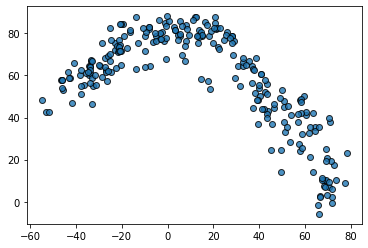

In [42]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Lat"],
            city_data_df['Max Temp'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

In [44]:
# Section 6.4.1 A regression line!
(slope, intercept, r_value, p_value, std_err) = linregress(city_data_df["Lat"], city_data_df['Max Temp'])
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.39x + 63.72
The p-value is: 0.000


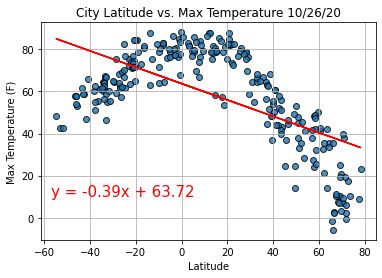

In [45]:
# Build the scatter plot for latitude vs. max temperature. This time add the regression line.
plt.scatter(city_data_df["Lat"],
            city_data_df['Max Temp'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Plot the regression line
regress_values = [(lat * slope + intercept) for lat in city_data_df["Lat"]]
plt.plot(city_data_df["Lat"],regress_values,"r")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-57,10), fontsize=15, color="red")

# Show plot.
plt.show()

# Does latitude correlate to max temp?
Module 6.4.2

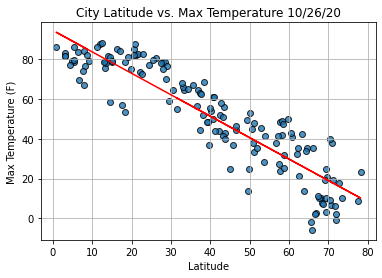

In [46]:
# Northern Hemisphere. create the same scatter plot but of just the Northern Hemisphere
# Look at the regression line, does it make sense?
northern_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
plt.scatter(northern_df['Lat'],
            northern_df['Max Temp'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Plot the regression line
(slope, intercept, r_value, p_value, std_err) = linregress(northern_df["Lat"], northern_df['Max Temp'])
regress_values = [(lat * slope + intercept) for lat in northern_df['Lat']]
plt.plot(northern_df['Lat'],regress_values,"r")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

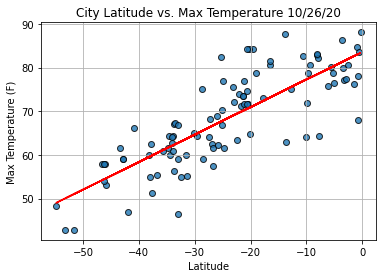

In [47]:
# Southern Hemisphere. create the same scatter plot but of just the Southern Hemisphere
# Look at the regression line, does it make sense?
southern_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
plt.scatter(southern_df['Lat'],
            southern_df['Max Temp'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Plot the regression line
(slope, intercept, r_value, p_value, std_err) = linregress(southern_df["Lat"], southern_df['Max Temp'])
regress_values = [(lat * slope + intercept) for lat in southern_df['Lat']]
plt.plot(southern_df['Lat'],regress_values,"r")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

# Gmaps!
Starting at Module 6.5.2

In [50]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [51]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [52]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Getting hotel information

In [53]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()
hotels

{'html_attributions': [],
 'next_page_token': 'AcnaJv1i_Hst_4NOGWFli-v61ioKgK57hEPqPmdV_oGIPxc0yBmMt-UHsgdj7UhOmtx-FOmsHcZ6TkZnTkcTgHVU_z4ZzKhi-En3zwvi2hglT4xyuil_1LgjCLvI3nYBa2FvCKf2eA14HbDsMi0G6N7Fi2mDl3fOalFwlEXtQgR1vKLImt-bc6lIHCG-n47GYkALk08lnSAVZv9pmCLqEz-8KHUlDjWWDdHXcyoirdqr-d75mmP-8OR49jkRrdL5eBI7ekcCtLyd3XtW6d574IMpXja8B2ggSwXbA3usc0RkPcnIJhjWzi15xoaFrP23CwApxnah1IO-jSnHyw01PP-IAb2FZ7jfCUaphDhy1g5HKLHtz6H-nP_J-SXSbBcHHAxThGsyHWlnzlkZ-JW1lIxlIGfPzD-6XdBR9pzpAWYZbjbEtJ0IYPg',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594393802915,
      'lng': 2.354352980291502},
     'southwest': {'lat': 48.8567414197085, 'lng': 2.351655019708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'name': 'Hôtel Duo',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 3840,
     'html_attributions': ['<a href="https://maps.

In [54]:
for key in hotels.keys():
    print(key)

html_attributions
next_page_token
results
status


In [55]:
for h in hotels['results']:
    print(f"{h['name']} : {h['geometry']['location']['lat']},{h['geometry']['location']['lng']}")

Hôtel Duo : 48.8581126,2.3529277
Hôtel Britannique : 48.8582861,2.3464944
Citadines Les Halles Paris (Apart Hotel Paris) : 48.8606655,2.3469293
Novotel Paris Les Halles : 48.8607769,2.3463217
Hôtel Ducs de Bourgogne : 48.86034799999999,2.344054
Citadines Saint-Germain-des-Prés Paris : 48.8555091,2.3408736
Paris France Hôtel : 48.86634659999999,2.36064
Hotel Regina Louvre : 48.86386539999999,2.3325488
ibis Paris Gare de Lyon Ledru Rollin 12ème : 48.84795229999999,2.370869
Hôtel De France Gare de Lyon Bastille : 48.8475464,2.3718722
Hôtel Corona Opéra : 48.8717386,2.3447052
Hôtel Libertel Austerlitz Jardin des Plantes : 48.8423491,2.3632246
Saint James Albany Paris Hôtel Spa : 48.864294,2.3307997
Hôtel Icône : 48.87110329999999,2.3389728
The Westin Paris - Vendôme : 48.8654924,2.3271121
Hôtel d'Orsay : 48.86038899999999,2.323112
Hôtel Mayfair Paris : 48.8661363,2.3260648
Holiday Inn Paris - Gare de L'Estates : 48.8758937,2.3591167
W Paris - Opéra : 48.8722237,2.3333825
InterContinental P

In [56]:
# Lets draw hotel locations on a map!
# See: https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html
hotel_info = []
for h in hotels['results']:
    info = {'name': h['name'], 'location': (h['geometry']['location']['lat'], h['geometry']['location']['lng'])}
    hotel_info.append(info)
print(hotel_info)

[{'name': 'Hôtel Duo', 'location': (48.8581126, 2.3529277)}, {'name': 'Hôtel Britannique', 'location': (48.8582861, 2.3464944)}, {'name': 'Citadines Les Halles Paris (Apart Hotel Paris)', 'location': (48.8606655, 2.3469293)}, {'name': 'Novotel Paris Les Halles', 'location': (48.8607769, 2.3463217)}, {'name': 'Hôtel Ducs de Bourgogne', 'location': (48.86034799999999, 2.344054)}, {'name': 'Citadines Saint-Germain-des-Prés Paris', 'location': (48.8555091, 2.3408736)}, {'name': 'Paris France Hôtel', 'location': (48.86634659999999, 2.36064)}, {'name': 'Hotel Regina Louvre', 'location': (48.86386539999999, 2.3325488)}, {'name': 'ibis Paris Gare de Lyon Ledru Rollin 12ème', 'location': (48.84795229999999, 2.370869)}, {'name': 'Hôtel De France Gare de Lyon Bastille', 'location': (48.8475464, 2.3718722)}, {'name': 'Hôtel Corona Opéra', 'location': (48.8717386, 2.3447052)}, {'name': 'Hôtel Libertel Austerlitz Jardin des Plantes', 'location': (48.8423491, 2.3632246)}, {'name': 'Saint James Albany

In [57]:
locations = [h['location'] for h in hotel_info]
marker_layer = gmaps.marker_layer(locations)
fig = gmaps.figure(center=(48.8566, 2.3522), zoom_level=12)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:
#Same map but with info boxes
# https://docs.python.org/2.4/lib/node109.html
info_box_template = """
<dl>
<dt>Name: </dt><dd>{name}</dd>
</dl>
"""
info = [info_box_template.format(**h) for h in hotel_info]
marker_layer = gmaps.marker_layer(locations, info_box_content=info)
fig = gmaps.figure(center=(48.8566, 2.3522), zoom_level=12)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))